Using cache found in /home/amit/.cache/torch/hub/intel-isl_MiDaS_master


Loading weights:  None


Using cache found in /home/amit/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
Using cache found in /home/amit/.cache/torch/hub/intel-isl_MiDaS_master


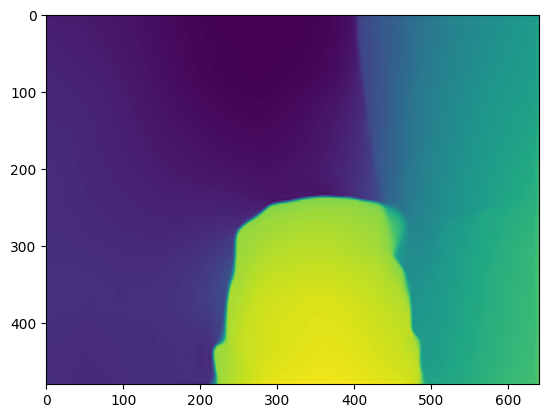

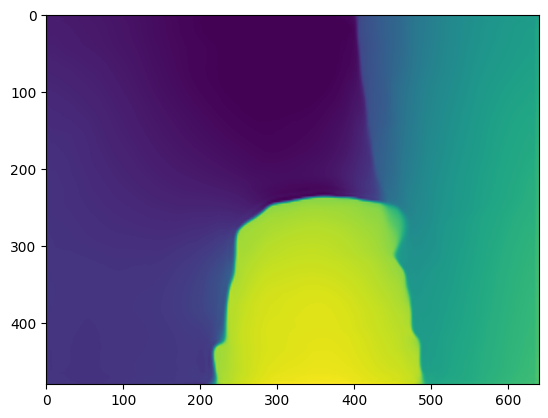

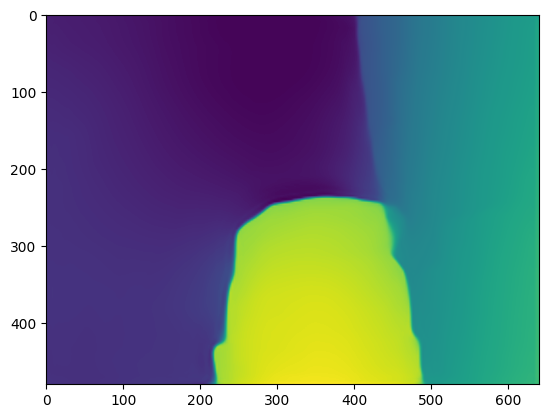

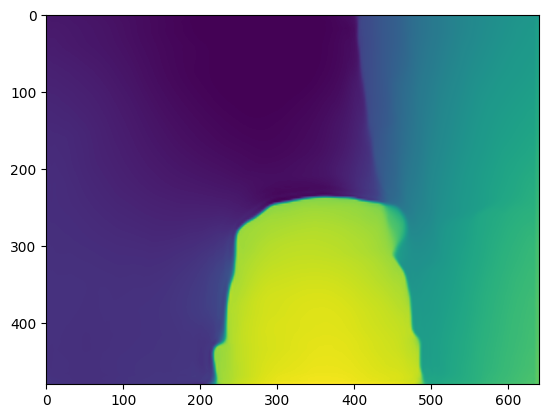

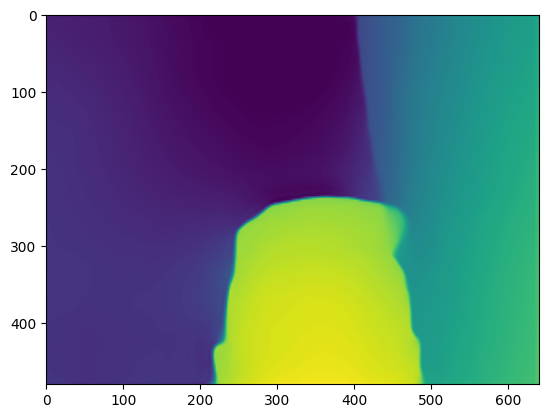

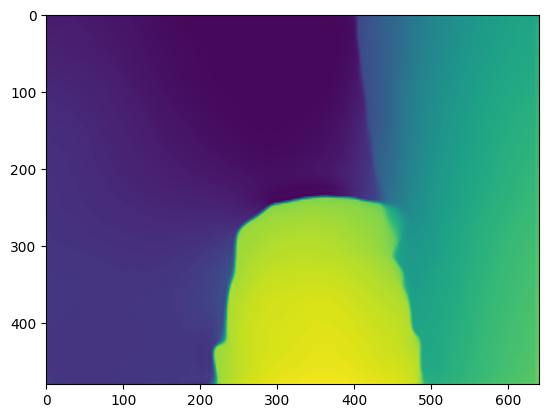

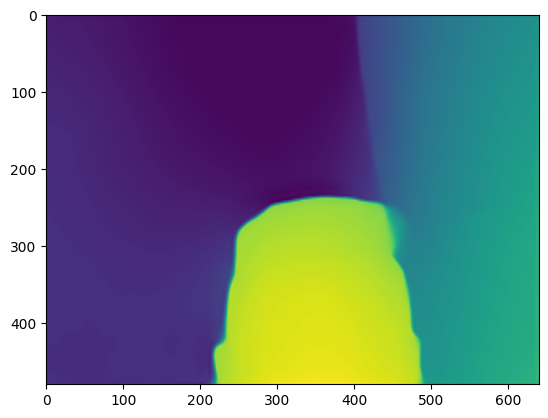

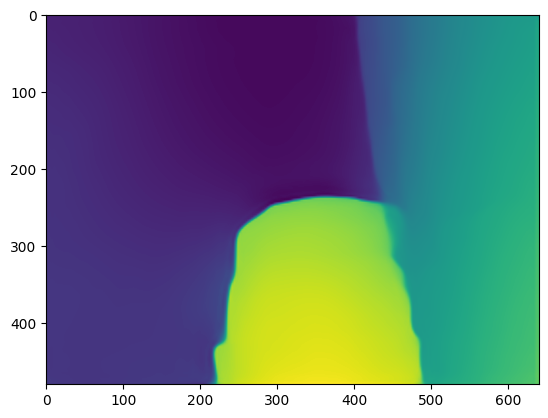

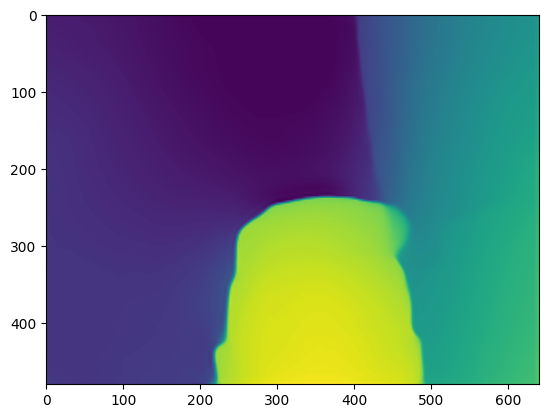

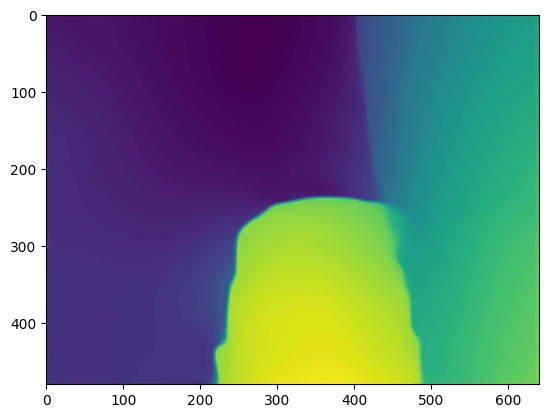

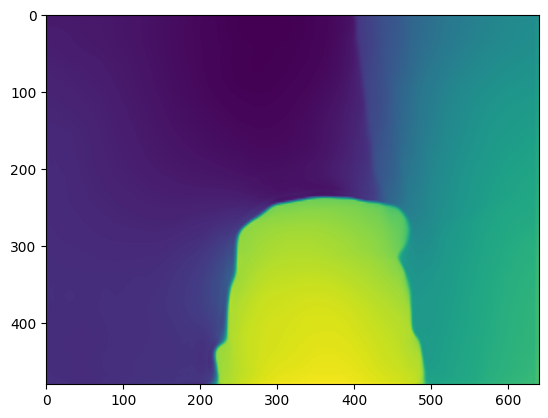

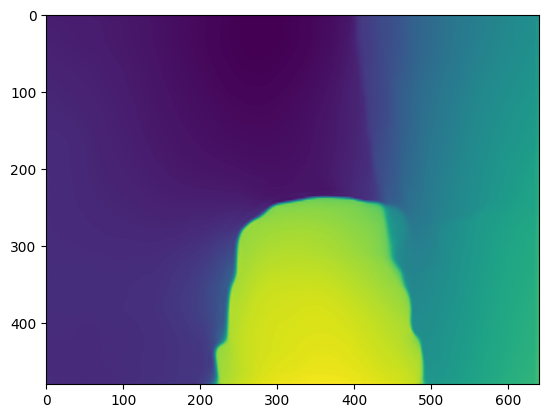

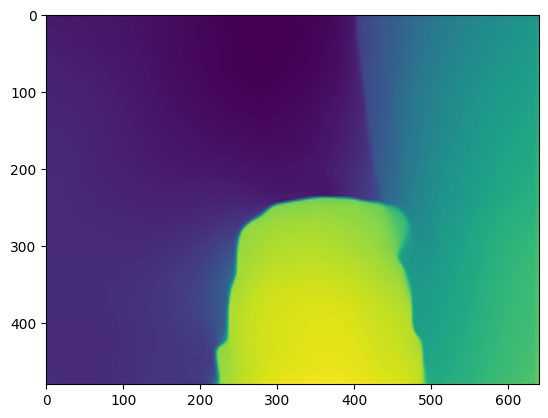

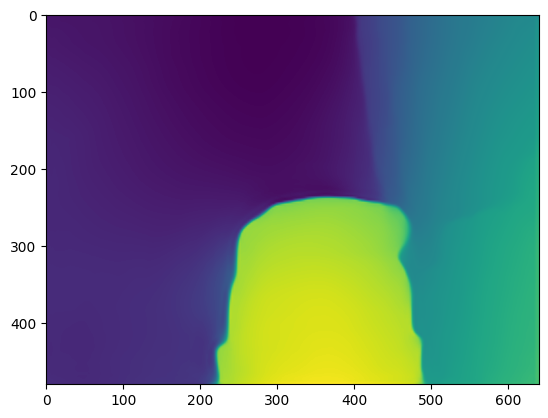

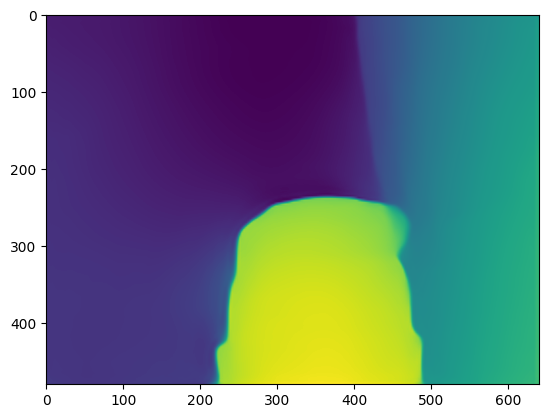

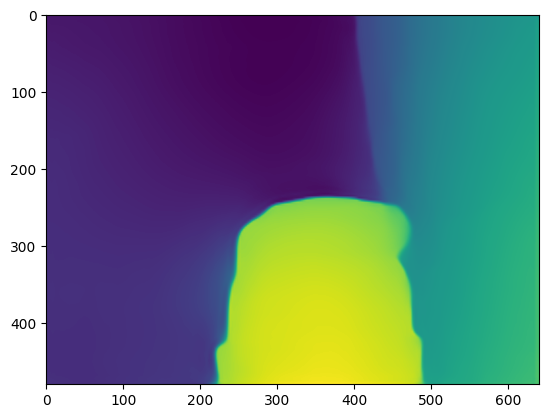

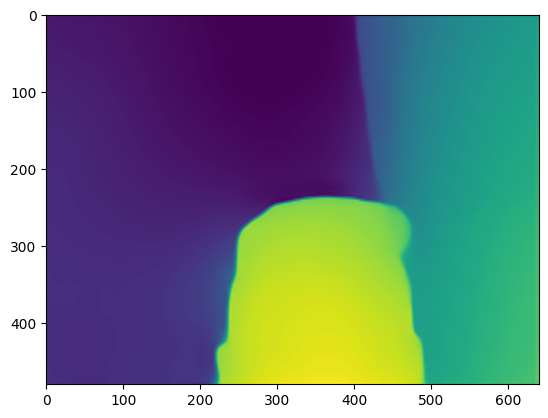

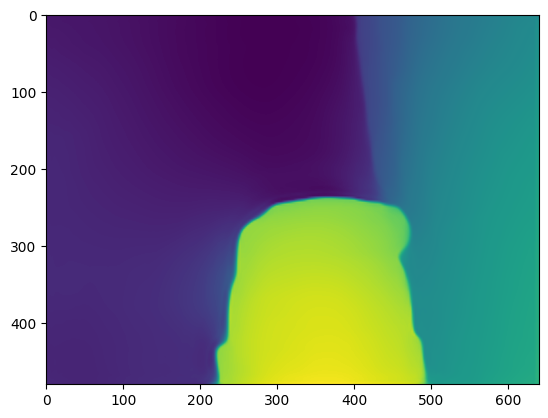

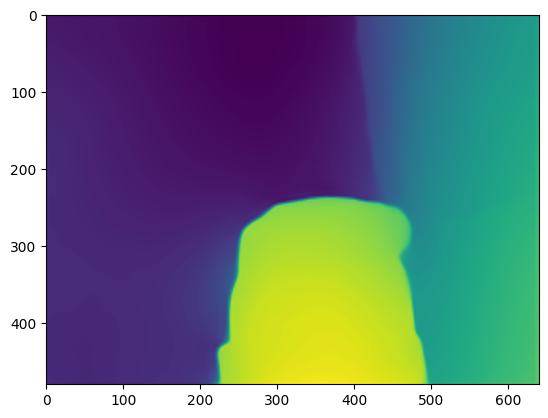

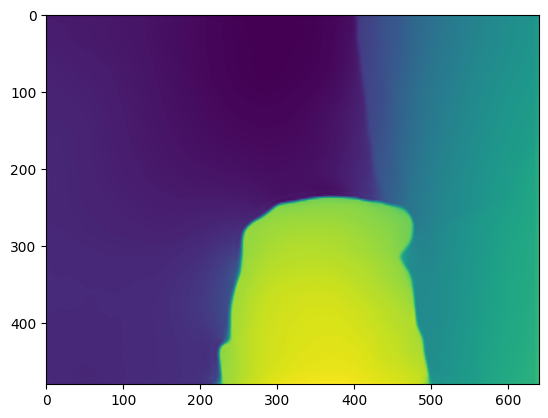

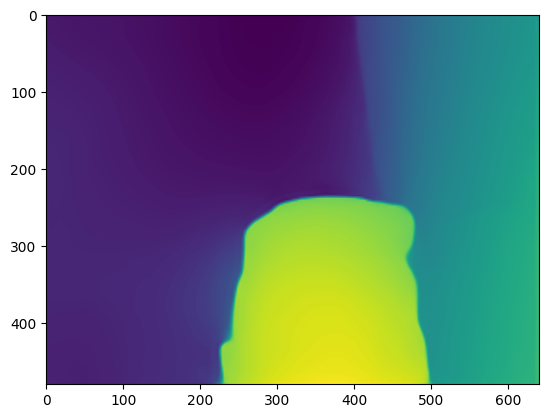

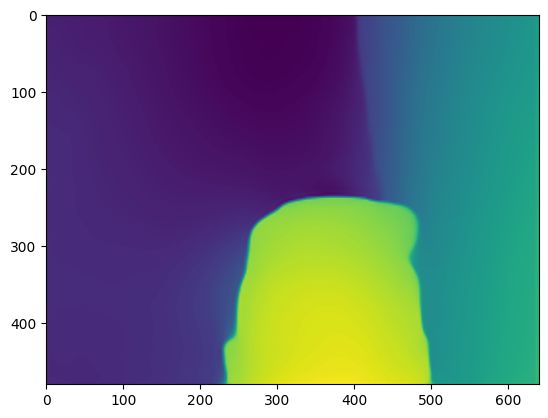

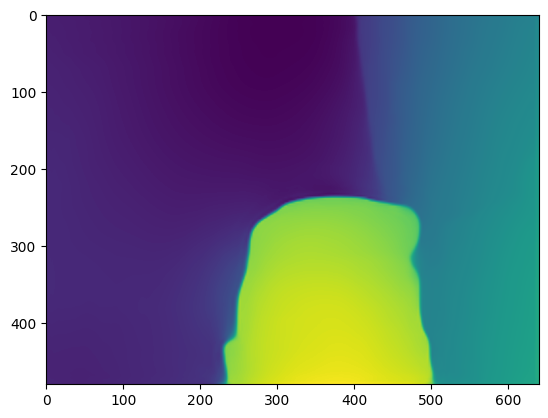

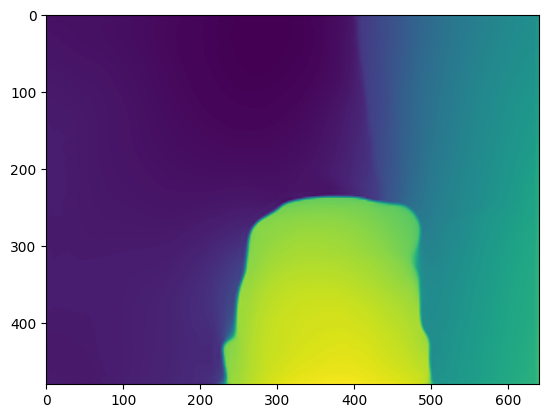

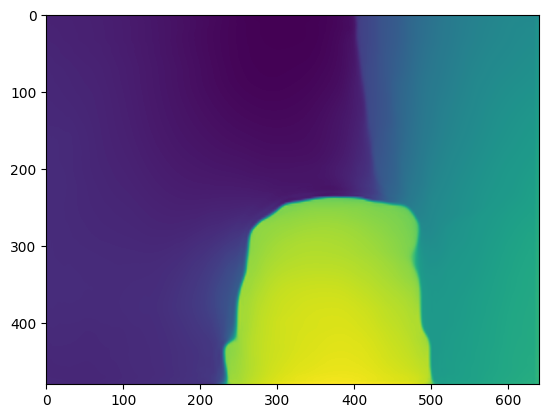

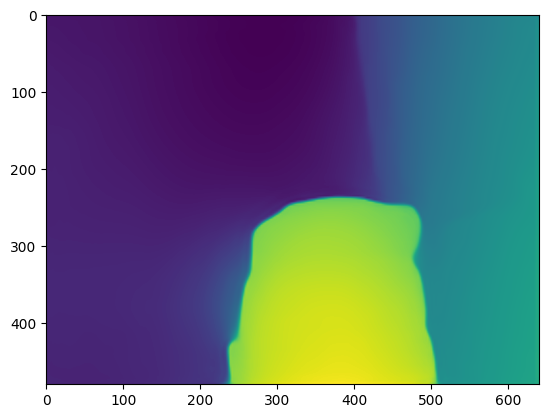

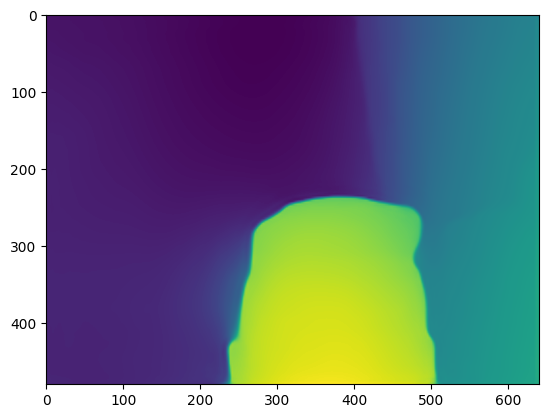

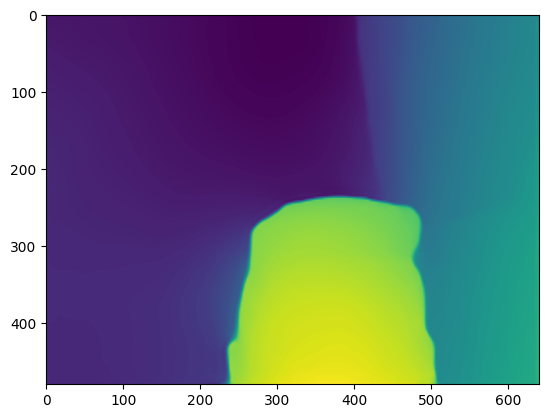

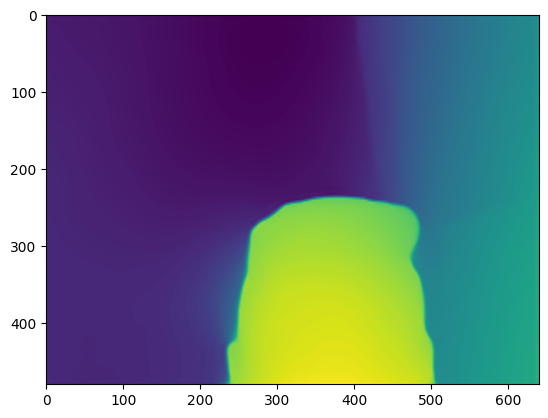

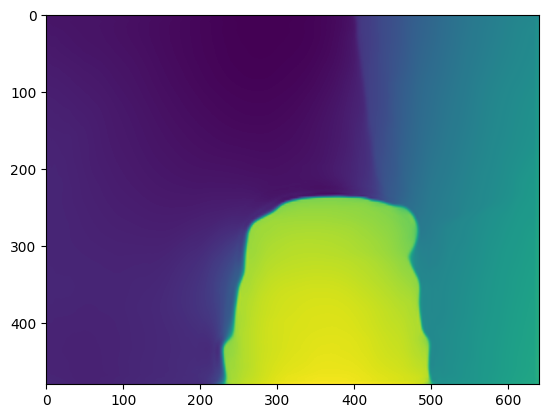

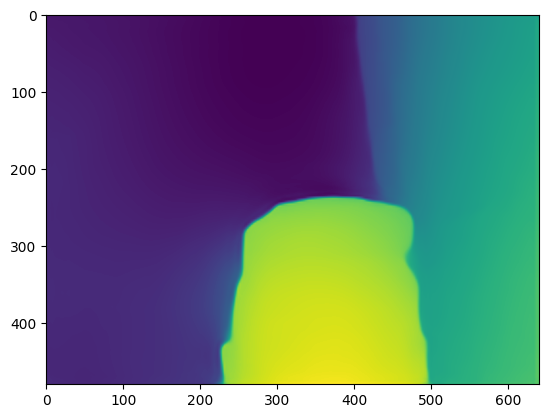

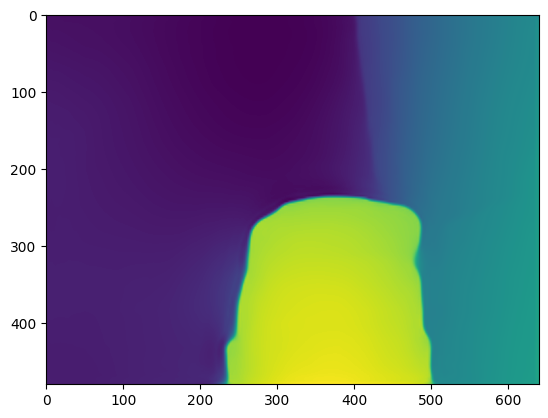

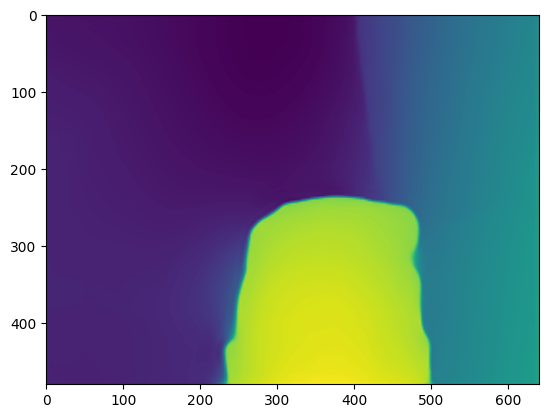

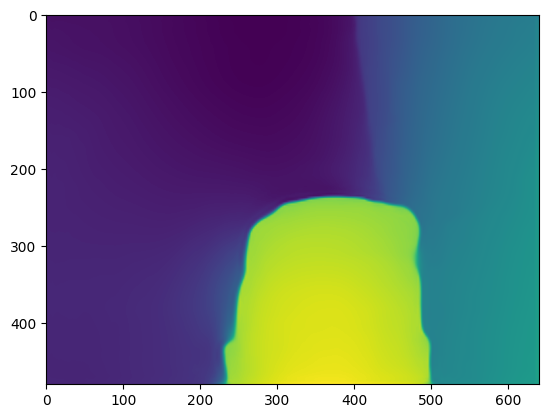

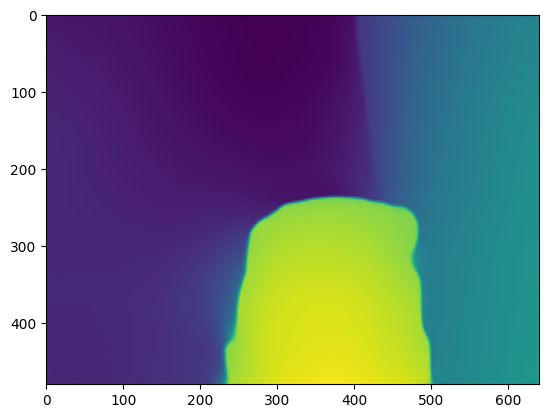

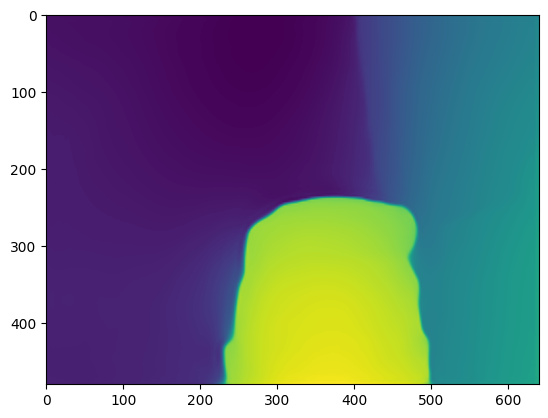

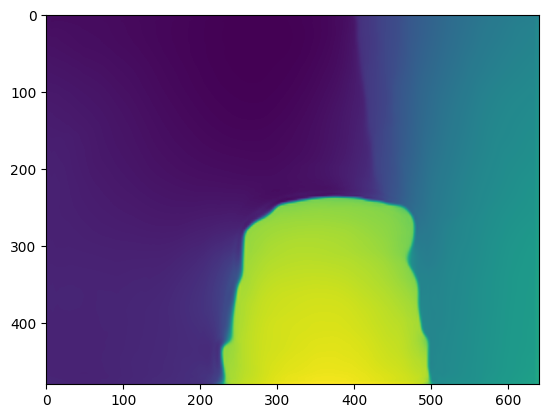

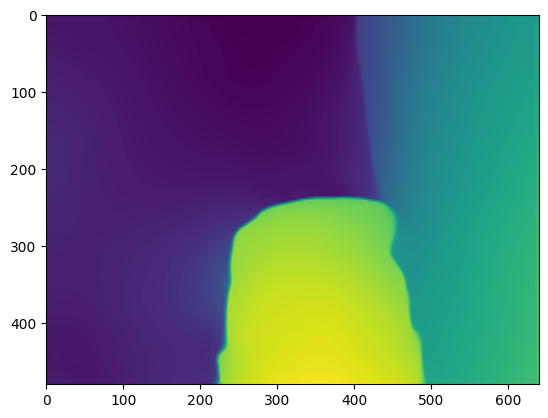

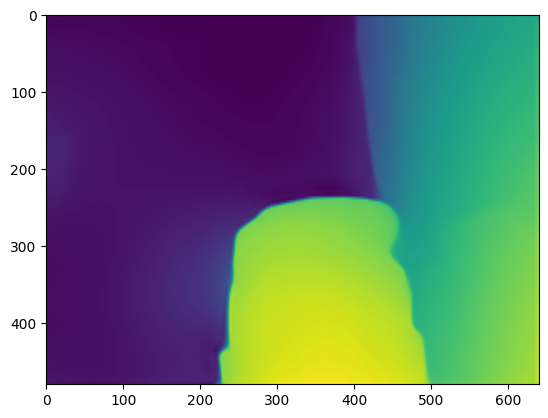

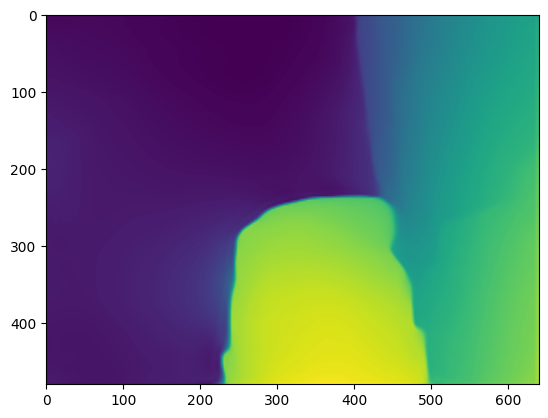

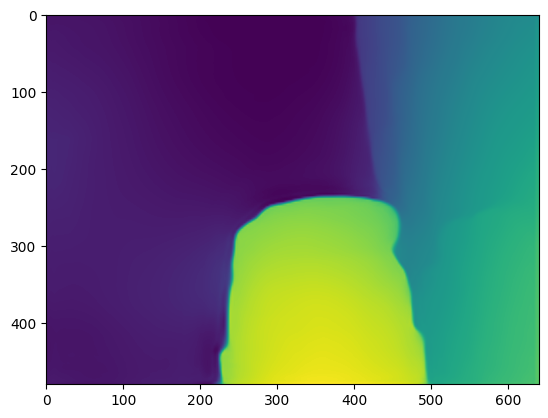

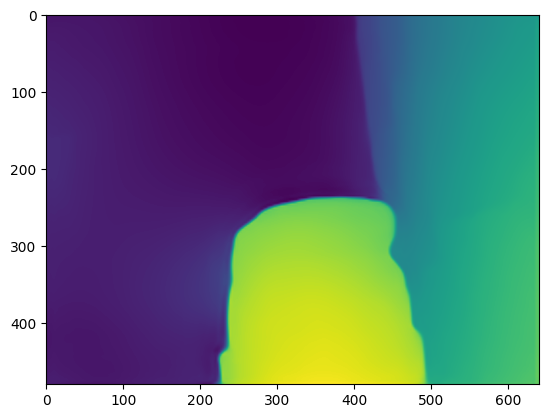

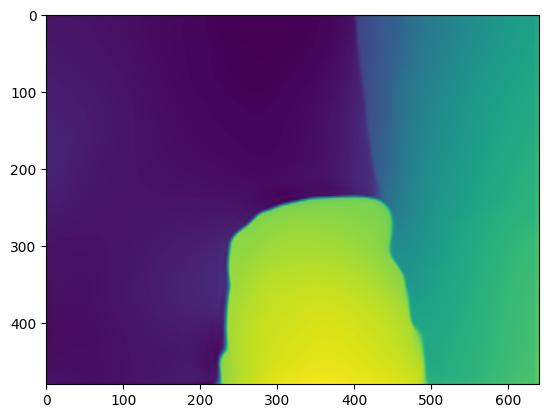

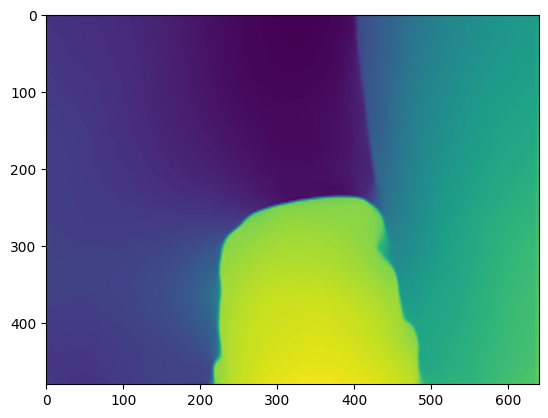

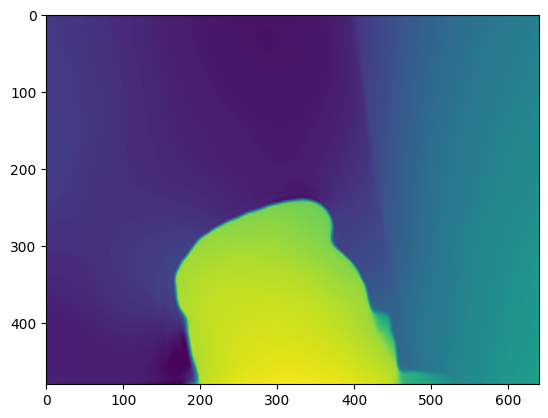

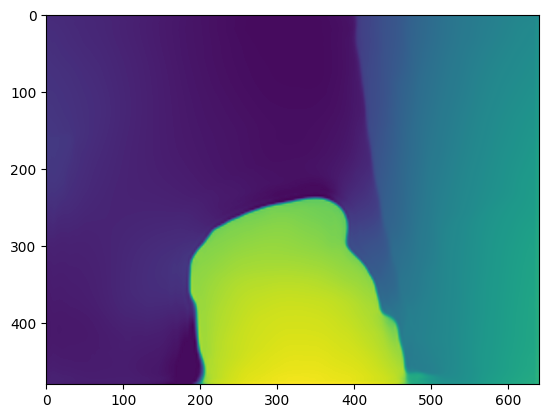

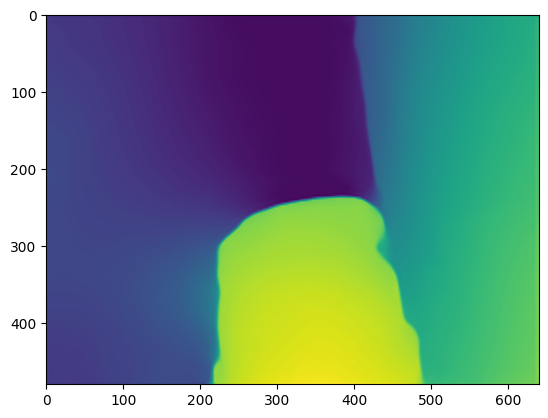

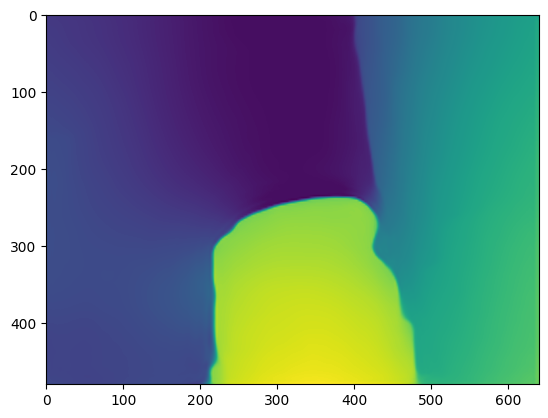

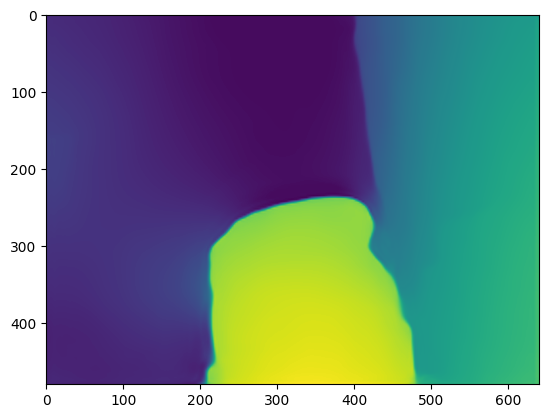

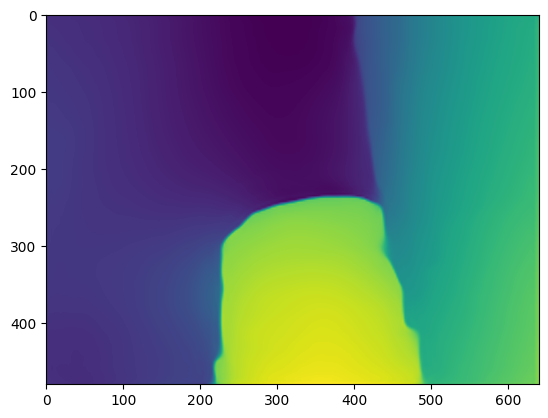

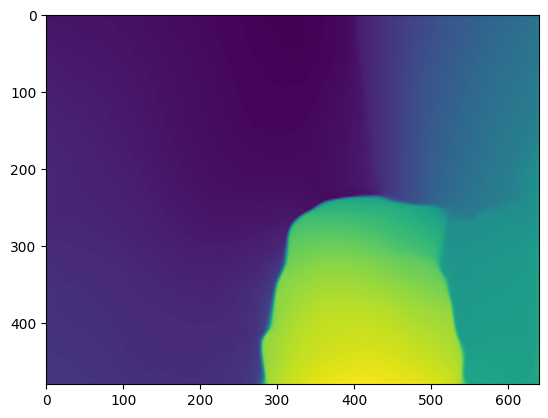

In [1]:
import cv2
import torch
import matplotlib.pyplot as plt

midas = torch.hub.load("intel-isl/MiDaS" , "MiDaS_small")
midas.to("cpu")
midas.eval()

transforms = torch.hub.load("intel-isl/MiDaS" , "transforms")
transform = transforms.small_transform

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    

    img = cv2.cvtColor(frame , cv2.COLOR_BGR2RGB)
    imgbatch = transform(img).to("cpu")

    with torch.no_grad():
        prediction = midas(imgbatch)

        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

        output = prediction.cpu().numpy()
    cv2.imshow(output)
    cv2.imshow("CV2frame" , frame)
    plt.pause(0.0001)

    if cv2.waitKey(10) & 0xFF == ord ("q"):
        cap.release()
        cv2.destroyAllWindows()

#plt.show()
